In [13]:
import numpy as np
import matplotlib.pyplot as plt
import slgbuilder
from functions import *


# Week 7 - quiz 

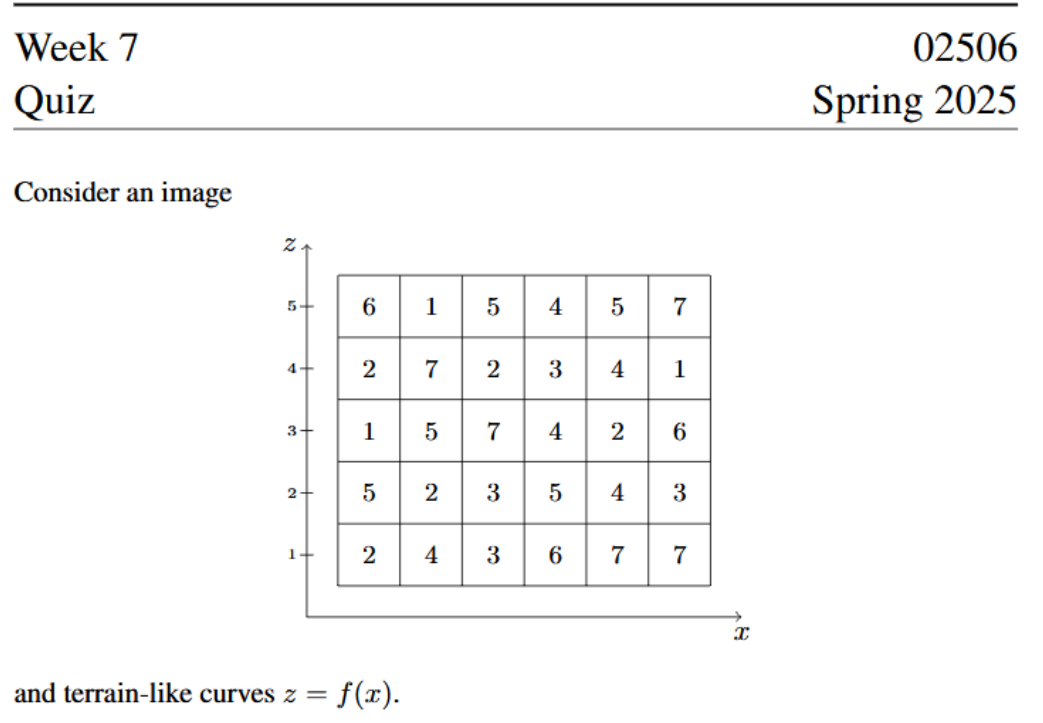

## Question 1
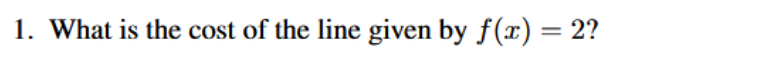

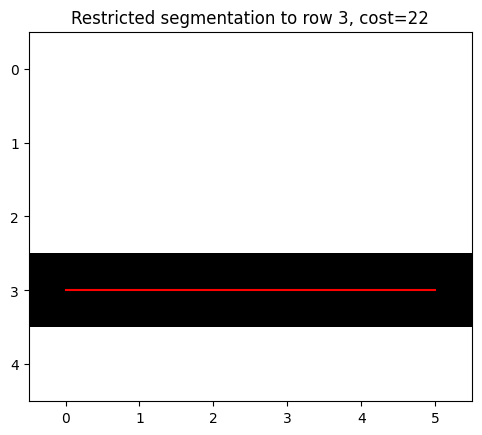

Cost of the line: 22


In [26]:
def cartesian_to_numpy_row(cartesian_row, num_rows):
    """
    Convert a row index from Cartesian coordinates (origin at bottom-left) to NumPy array coordinates (origin at top-left).
    
    Parameters:
    -----------
    cartesian_row : int
        The row number in Cartesian coordinates (0 = bottom row)
    num_rows : int
        Total number of rows in the array
    
    Returns:
    --------
    int
        The equivalent row index in NumPy array coordinates (0 = top row)
    
    Notes:
    ------
    The conversion formula accounts for:
    1. Flipping the y-axis (num_rows - 1 - cartesian_row)
    2. Adjusting for 0-based indexing in both coordinate systems
    """
    # First flip the row (num_rows - 1 - cartesian_row) to account for different origin positions
    # Then add 1 to handle the different coordinate systems
    return (num_rows - 1 - cartesian_row) + 1  # Equivalent to: num_rows - cartesian_row




I = np.array([
    [6, 1, 5, 4, 5, 7],
    [2, 7, 2, 3, 4, 1],
    [1, 5, 7, 4, 2, 6],
    [5, 2, 3, 5, 4, 3],
    [2, 4, 3, 6, 7, 7]
]).astype(np.int32)


def cost_of_the_line(Image, cartesian_desired_row, delta):
    """
    Calculate the cost of a specific line in an image under smoothness constraints.
    
    This function forces a segmentation line to include a specific row by setting 
    high costs for all other rows, then computes the minimum cost path through 
    the modified cost matrix.
    
    Parameters:
    -----------
    Image : numpy.ndarray
        The input image/cost matrix
    cartesian_desired_row : int
        The desired row in Cartesian coordinates (0 = bottom row)
    delta : float
        Smoothness parameter for the segmentation
    
    Returns:
    --------
    float
        The total cost of the segmentation line
    """
    # Convert Cartesian row (origin at bottom-left) to NumPy row (origin at top-left)
    desired_row = cartesian_to_numpy_row(cartesian_desired_row, Image.shape[0])
    high_cost = 1e6  # A very high cost for unwanted rows

    # Create a modified cost matrix: use the original cost only at the desired row,
    # and set a high cost for all other rows
    I_modified = np.full_like(Image, high_cost)
    I_modified[desired_row, :] = Image[desired_row, :]

    # Build the graph using the modified cost matrix
    layer = slgbuilder.GraphObject(I_modified)
    helper = slgbuilder.MaxflowBuilder()
    helper.add_object(layer)
    helper.add_layered_boundary_cost()
    helper.add_layered_smoothness(delta=delta, wrap=False)
    helper.solve()

    # Get the segmentation (which is a boolean array indicating one segment vs. the other)
    segmentation = helper.what_segments(layer)

    # Extract the segmentation line (boundary between segments)
    # This finds, for each column, the first "True" (foreground) pixel from the bottom
    segmentation_line = segmentation.shape[0] - np.argmax(segmentation[::-1, :], axis=0) - 1

    # Compute the total cost along this segmentation line using the original Image
    # (not the modified one with high costs)
    cost = (Image[segmentation_line, np.arange(segmentation.shape[1])]).sum()

    # Plot the modified cost matrix and the restricted segmentation line
    fig, ax = plt.subplots()
    ax.imshow(I_modified, cmap='gray')
    ax.plot(segmentation_line, 'r')
    ax.set_title(f'Restricted segmentation to row {desired_row}, cost={cost}')
    plt.show()

    return cost


line_cost = cost_of_the_line(I, cartesian_desired_row=2, delta=0)
print(f'Cost of the line: {line_cost}')

______________________

In [27]:
def min_cost_solution(Image, delta):
     """
     Compute the minimum cost segmentation path through an image using graph cuts.
     
     This function creates a graph from the input image, applies smoothness constraints
     with the specified delta parameter, and finds the optimal segmentation path that
     minimizes the total cost.
     
     Parameters:
     -----------
     Image : numpy.ndarray
          The input image/cost matrix
     delta : float
          Smoothness parameter that controls the penalty for changes between adjacent columns
          Higher values enforce more horizontal segmentation lines
     
     Returns:
     --------
     float
          The total cost of the optimal segmentation line
     
     Notes:
     ------
     The function also visualizes the result by plotting the image with the
     segmentation line overlaid in red.
     """
     # Calculate row sums for reference (not used in actual segmentation)
     r = I.sum(axis=1)
     
     # Store reference values (for debugging or comparison)
     a = r[2]  # Sum of the third row (index 2)
     b = r.min()  # Minimum row sum
     
     # Build the graph using the image as cost matrix
     layer = slgbuilder.GraphObject(I)
     helper = slgbuilder.MaxflowBuilder()
     helper.add_object(layer)
     helper.add_layered_boundary_cost()
     helper.add_layered_smoothness(delta=delta, wrap=False)
     
     # Solve the min-cut problem
     helper.solve()
     
     # Extract segmentation result (boolean mask of the segments)
     segmentation = helper.what_segments(layer)
     
     # Compute the segmentation line (boundary between segments)
     # This finds, for each column, the first "True" pixel from the bottom
     segmentation_line = segmentation.shape[0] - np.argmax(segmentation[::-1,:], axis=0) - 1
     
     # Calculate the total cost of the segmentation line by summing
     # the costs of the pixels along the path
     total_cost = (Image[segmentation_line, np.arange(segmentation.shape[1])]).sum()
     
     # Visualize the result
     fig, ax = plt.subplots()
     ax.imshow(I)
     ax.plot(segmentation_line, 'r')
     ax.set_title(f'delta={delta}, cost={total_cost}')
     plt.show()
     
     return total_cost

## Question 2 
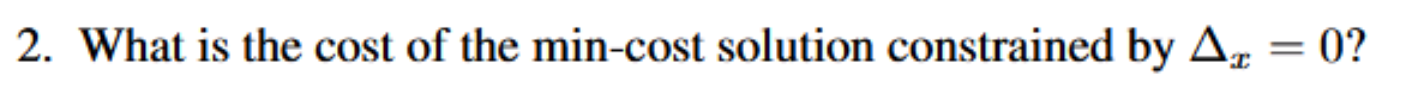

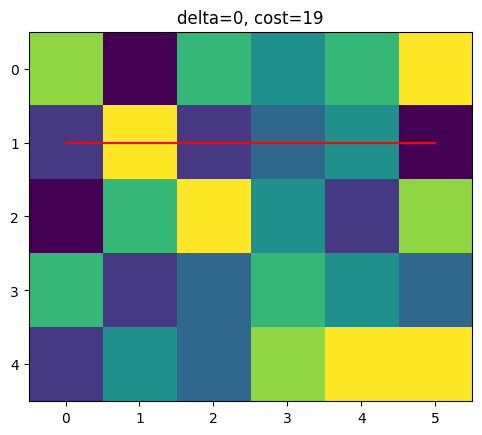

The cost of 0 is 19


In [28]:
I = np.array([
          [6,1,5,4,5,7],
          [2,7,2,3,4,1],
          [1,5,7,4,2,6],
          [5,2,3,5,4,3],
          [2,4,3,6,7,7]
          ]).astype(np.int32)


delta = 0 

zero_cost = min_cost_solution(I, delta)

print(f"The cost of {delta} is {zero_cost}")

## Question 3 
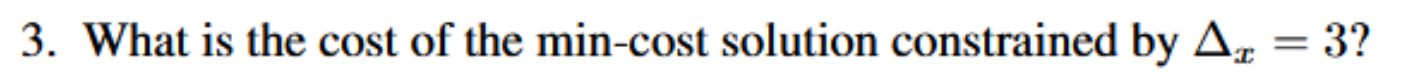

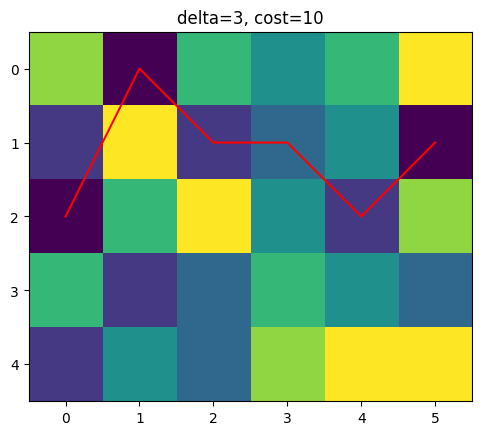

The cost of 3 is 10


In [29]:
delta_three = 3
three_cost = min_cost_solution(I, delta_three)

print(f"The cost of {delta_three} is {three_cost}")

# PlotALL 


(6,)
[1 1 1 1 1 1]
(6,)
[1 0 1 1 2 1]
(6,)
[2 0 1 1 2 1]
(6,)
[2 0 1 1 2 1]
(6,)
[2 0 1 1 2 1]


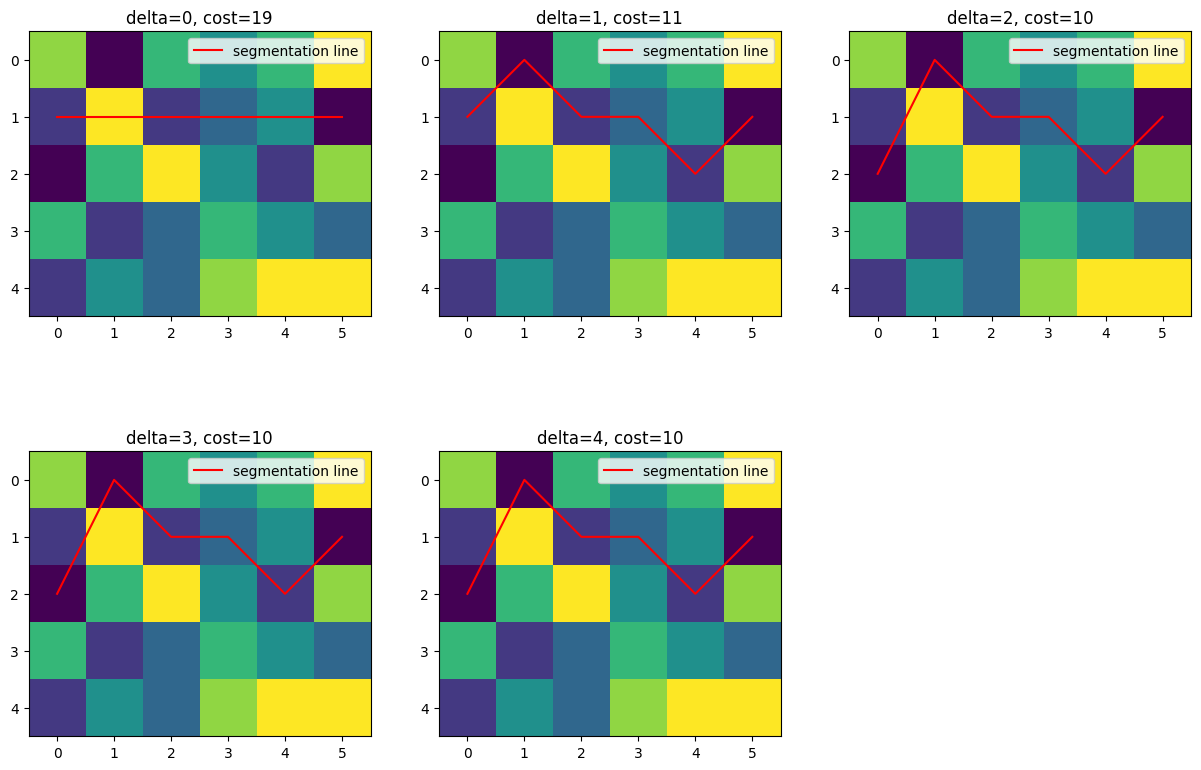

In [30]:
#%% JUST CHECKING
fig, ax = plt.subplots(2,3, figsize=(15,10))
ax = ax.ravel()

for i in range(5):
    ax[i].imshow(I)
    
    delta = i
    
    layer = slgbuilder.GraphObject(I)
    helper = slgbuilder.MaxflowBuilder()
    helper.add_object(layer)
    helper.add_layered_boundary_cost()
    helper.add_layered_smoothness(delta=delta, wrap=False)
    
    helper.solve()
    segmentation = helper.what_segments(layer)
        
    segmentation_line = segmentation.shape[0] - np.argmax(segmentation[::-1,:], axis=0) - 1
    print(segmentation_line.shape)
    print(segmentation_line)
    cost = (I[segmentation_line, np.arange(segmentation.shape[1])]).sum()
    
    ax[i].imshow(I)
    ax[i].plot(segmentation_line, 'r')
    ax[i].set_title(f'delta={delta}, cost={cost}')
    ax[i].legend(['segmentation line'])
    # plot the color bar 

fig.delaxes(ax[5])

plt.show()

In [24]:
from functions import * 
data = create_entry(line_cost=line_cost, zero_cost=zero_cost, three_cost=three_cost)

name_of_file = "quiz.txt"

save_to_file(name_of_file, data)

print(f"Data saved to {name_of_file}")

Data saved to quiz.txt
